In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models,layers,optimizers,utils
import numpy as np
import matplotlib.pyplot as plt


# Loading Dataset

In [5]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)
print(train_targets)

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

In [6]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [7]:
test_data[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

In [8]:
train_targets[0]

15.2

# Preparing the Data

In [10]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [12]:
# For Reusability, model is defined as a function.

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],))) # number of features (13) are used as vector in input shape
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1)) # no activation function
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model

In [14]:
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 100
all_scores = []
all_mae_histories = []

for i in range(k):
  print('processing fold # ', i)
  # prepare the validation data: data from partition # k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  # prepare the training data: data from data - k
  partial_train_data = np.concatenate(                    
      [train_data[:i * num_val_samples],
      train_data[(i + 1 ) * num_val_samples:]],
  axis = 0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
      train_targets[(i + 1 ) * num_val_samples:]],
  axis = 0)
  # Build the Keras Models (already commpiled)
  model = build_model()
  # Train the model (in silence mode, verbose = 0)
  history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 1)
  # Evaluate the model on the validation data
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)
mae_history= history.history["mae"]
all_mae_histories.append(mae_history)

processing fold #  0
Train on 303 samples
Epoch 1/100
303/303 [==============================] - 1s 3ms/sample - loss: 270.4242 - mae: 12.6359
Epoch 2/100
303/303 [==============================] - 0s 1ms/sample - loss: 28.9302 - mae: 3.8185
Epoch 3/100
303/303 [==============================] - 0s 1ms/sample - loss: 20.9807 - mae: 3.1324
Epoch 4/100
303/303 [==============================] - 0s 1ms/sample - loss: 17.9040 - mae: 2.8978
Epoch 5/100
303/303 [==============================] - 0s 1ms/sample - loss: 15.7824 - mae: 2.6978
Epoch 6/100
303/303 [==============================] - 0s 1ms/sample - loss: 14.4660 - mae: 2.5735
Epoch 7/100
303/303 [==============================] - 0s 1ms/sample - loss: 13.3409 - mae: 2.4226
Epoch 8/100
303/303 [==============================] - 0s 1ms/sample - loss: 12.2373 - mae: 2.4009
Epoch 9/100
303/303 [==============================] - 0s 1ms/sample - loss: 12.0318 - mae: 2.3405
Epoch 10/100
303/303 [==============================] - 0s 1ms/sa

303/303 [==============================] - 0s 1ms/sample - loss: 4.5469 - mae: 1.4624
Epoch 84/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.3526 - mae: 1.4326
Epoch 85/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.6365 - mae: 1.4669
Epoch 86/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.5283 - mae: 1.3997
Epoch 87/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.6273 - mae: 1.4645
Epoch 88/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.4989 - mae: 1.4276
Epoch 89/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.5534 - mae: 1.4446
Epoch 90/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.4851 - mae: 1.4209
Epoch 91/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.5035 - mae: 1.4356
Epoch 92/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.3190 - mae: 1.3987
Epoch 93/100
303/303 [=

303/303 [==============================] - 0s 1ms/sample - loss: 4.8835 - mae: 1.4691
Epoch 66/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.0874 - mae: 1.4093
Epoch 67/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.7555 - mae: 1.4167
Epoch 68/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.8286 - mae: 1.4990
Epoch 69/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.6239 - mae: 1.3847
Epoch 70/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.5449 - mae: 1.3922
Epoch 71/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.4905 - mae: 1.3978
Epoch 72/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.7220 - mae: 1.4017
Epoch 73/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.4422 - mae: 1.3928
Epoch 74/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.5657 - mae: 1.3476
Epoch 75/100
303/303 [=

303/303 [==============================] - 0s 1ms/sample - loss: 5.3681 - mae: 1.6135
Epoch 48/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.3950 - mae: 1.6123
Epoch 49/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.4360 - mae: 1.6001
Epoch 50/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.1747 - mae: 1.5782
Epoch 51/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.9562 - mae: 1.6030
Epoch 52/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.3379 - mae: 1.5814
Epoch 53/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.0465 - mae: 1.5659
Epoch 54/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.2701 - mae: 1.5603
Epoch 55/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.7165 - mae: 1.4743
Epoch 56/100
303/303 [==============================] - 0s 1ms/sample - loss: 4.9217 - mae: 1.5659
Epoch 57/100
303/303 [=

303/303 [==============================] - 0s 1ms/sample - loss: 6.6217 - mae: 1.7457
Epoch 30/100
303/303 [==============================] - 0s 1ms/sample - loss: 7.2275 - mae: 1.7895
Epoch 31/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.3422 - mae: 1.6816
Epoch 32/100
303/303 [==============================] - 0s 1ms/sample - loss: 7.0447 - mae: 1.7671
Epoch 33/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.6331 - mae: 1.6990
Epoch 34/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.8345 - mae: 1.7573
Epoch 35/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.5582 - mae: 1.7406
Epoch 36/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.2645 - mae: 1.6467
Epoch 37/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.5408 - mae: 1.7002
Epoch 38/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.2597 - mae: 1.6531
Epoch 39/100
303/303 [=

In [15]:
all_scores

[2.327218, 2.6727383, 2.5501988, 2.35662]

In [16]:
np.mean(all_scores)

2.4766936

In [19]:
[len(x) for x in all_mae_histories]

[100]

# Plotting Errors# Plotting Validation Scores

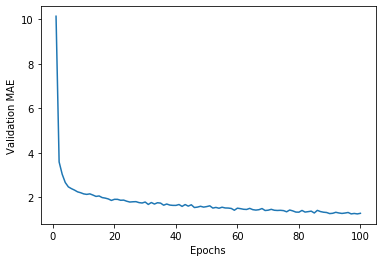

In [20]:
plt.plot(range(1, len(average_mae_history) + 1 ), average_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

# Plotting Validation Scores - Excluding the first 10 data points

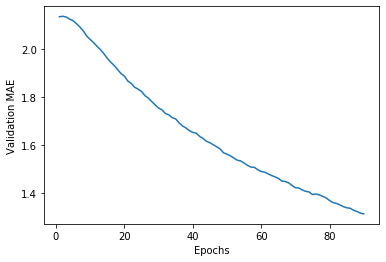

In [21]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1- factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Training the final model

In [22]:
model = build_model()

#Training on Entire Data
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

Train on 404 samples
Epoch 1/80
404/404 [==============================] - 1s 2ms/sample - loss: 516.3965 - mae: 20.7390
Epoch 2/80
404/404 [==============================] - 0s 191us/sample - loss: 370.3322 - mae: 16.9479
Epoch 3/80
404/404 [==============================] - 0s 174us/sample - loss: 211.1408 - mae: 12.1097
Epoch 4/80
404/404 [==============================] - 0s 172us/sample - loss: 98.9916 - mae: 7.7768
Epoch 5/80
404/404 [==============================] - 0s 174us/sample - loss: 54.8060 - mae: 5.6545
Epoch 6/80
404/404 [==============================] - 0s 184us/sample - loss: 35.1794 - mae: 4.3552
Epoch 7/80
404/404 [==============================] - 0s 169us/sample - loss: 25.3311 - mae: 3.5657
Epoch 8/80
404/404 [==============================] - 0s 172us/sample - loss: 20.6861 - mae: 3.2026
Epoch 9/80
404/404 [==============================] - 0s 176us/sample - loss: 18.3127 - mae: 2.9979
Epoch 10/80
404/404 [==============================] - 0s 162us/sample - lo

2.763815


In [23]:
test_mse_score

17.53165480669807